In [1]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb

from keras.callbacks import ModelCheckpoint,CSVLogger
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

Using TensorFlow backend.


In [2]:
from sklearn.linear_model import Ridge,LogisticRegression
# stack_clf = LogisticRegression(n_jobs=-1)
ridge_clf = Ridge(alpha=1.0)

In [10]:
year = pd.read_csv("../11_hour_merged_data.csv")
# transformer = Normalizer().fit(year)
# Y_norm = transformer.transform(year)
# print(Y_norm)
X = year.drop(columns=['GHI'])
Y = year.pop('GHI')

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)

seed = 7
test_size = 0.33
X_train, X_test_, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [14]:
NN_model_1 = Sequential()

# The Input Layer :
NN_model_1.add(Dense(32, kernel_initializer='normal',input_dim = X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_1.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dropout(0.2, noise_shape=None, seed=None))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model_1.summary()

# Compile the network :
NN_model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
csv_logger = CSVLogger('NN_model_archi2.log')
history = NN_model_1.fit(X_train, y_train, verbose=0, epochs=150, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_16 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total para

In [15]:
output_dnn = NN_model_1.predict(X_test_)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-output_dnn[counter])**2
print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))

forest rmse: 106.46482877281586


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'xgb_1': 239.99916601184995, 'xgb_2': 111.14740278780549, 'xgb_3': 102.46776001356427, 'xgb_4': 102.03076799312652, 'xgb_5': 102.88681847765142, 'xgb_6': 104.50870499772212, 'xgb_7': 104.72618747273953, 'xgb_8': 108.0080772222353, 'xgb_9': 108.791577172028, 'xgb_10': 104.54344064139296, 'xgb_11': 107.29852300588169, 'xgb_12': 110.13103042235134, 'xgb_13': 106.46482877281586}
forest rmse: 10.114801418133371


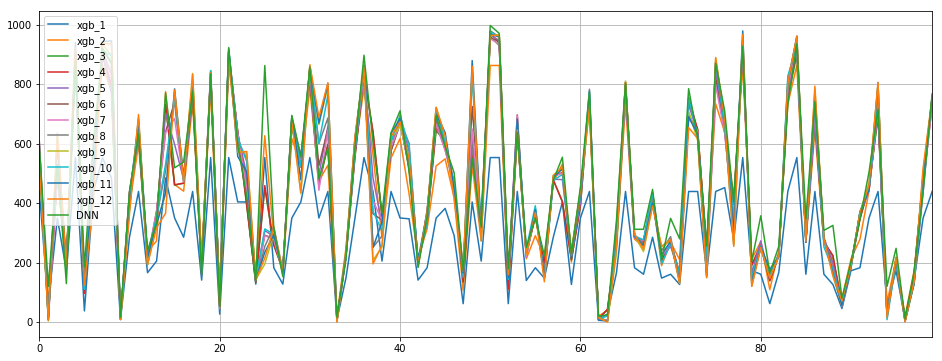

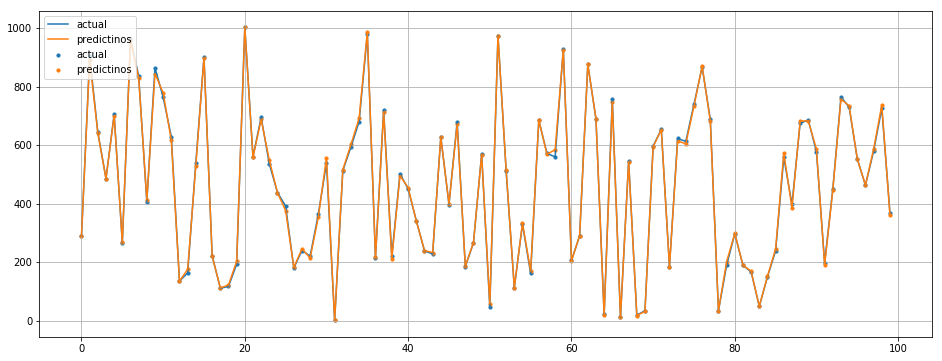

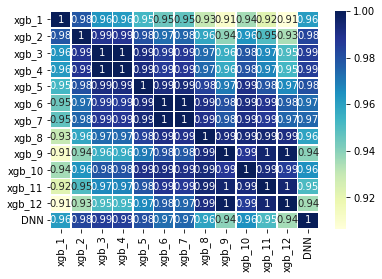

In [17]:
output_dnn = NN_model_1.predict(X_train)
output_dnn_ = [i[0] for i in output_dnn]

year_new = pd.read_csv("../11_hour_merged_data.csv")
X = year_new.drop(columns=['GHI'])
Y = year_new.pop('GHI')
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

xgb_1 = XGBRegressor(learning_rate=0.4,max_depth=4,n_estimators=2)
xgb_2 = XGBRegressor(learning_rate=0.4,max_depth=4,n_estimators=6)
xgb_3 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=8)
xgb_4 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=9)
xgb_5 = XGBRegressor(learning_rate=0.4,max_depth=8,n_estimators=10)
xgb_6 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=9)
xgb_7 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=8)
xgb_8 = XGBRegressor(learning_rate=0.4,max_depth=12,n_estimators=12)
xgb_9 = XGBRegressor(learning_rate=0.4,max_depth=15,n_estimators=20)
xgb_10 = XGBRegressor(learning_rate=0.4,max_depth=8,n_estimators=35)
xgb_11 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=40)
xgb_12 = XGBRegressor(learning_rate=0.4,max_depth=12,n_estimators=60)

xgb_1.fit(X_train,y_train)
xgb_2.fit(X_train,y_train)
xgb_3.fit(X_train,y_train)
xgb_4.fit(X_train,y_train)
xgb_5.fit(X_train,y_train)
xgb_6.fit(X_train,y_train)
xgb_7.fit(X_train,y_train)
xgb_8.fit(X_train,y_train)
xgb_9.fit(X_train,y_train)
xgb_10.fit(X_train,y_train)
xgb_11.fit(X_train,y_train)
xgb_12.fit(X_train,y_train)

predicted_xgb_1 = xgb_1.predict(X_train)
predicted_xgb_2 = xgb_2.predict(X_train)
predicted_xgb_3 = xgb_3.predict(X_train)
predicted_xgb_4 = xgb_4.predict(X_train)
predicted_xgb_5 = xgb_5.predict(X_train)
predicted_xgb_6 = xgb_6.predict(X_train)
predicted_xgb_7 = xgb_7.predict(X_train)
predicted_xgb_8 = xgb_8.predict(X_train)
predicted_xgb_9 = xgb_9.predict(X_train)
predicted_xgb_10 = xgb_10.predict(X_train)
predicted_xgb_11 = xgb_11.predict(X_train)
predicted_xgb_12 = xgb_12.predict(X_train)


#######################################
#Visulising the different trees
####################################

# plot_tree(xgb_1,num_trees=0, rankdir='LR')
# plt.show()

score = {}
models = [xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9,xgb_10,xgb_11,xgb_12,NN_model_1]
for counter1,model in enumerate(models):
    predictinos = model.predict(X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-predictinos[counter])**2
    score["xgb_"+str(counter1+1)] = (math.sqrt(squared_sum/len(y_test)))  
print(score)


df_pred = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
    'DNN':output_dnn_,
})
X_train, X_test, y_train, y_test = train_test_split(df_pred, y_train, test_size=test_size, random_state=seed)

ridge_clf.fit(X_train,y_train)

predictinos = ridge_clf.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))

min_x_test = y_test[0:100]
predictinos = ridge_clf.predict(X_test)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
df_plot = df_pred[0:100]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test,linewidth=1.5,label="actual")
ax.scatter(x,original_y_test,s=10,label="actual")
ax.plot(predictinos,linewidth=1.5,label="predictinos")
ax.scatter(x,predictinos,s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()

corr_hm = sns.heatmap(df_pred.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


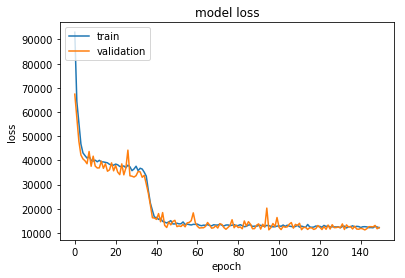

In [18]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
clf = XGBRegressor(max_depth=8, learning_rate=0.4, n_estimators=10)
scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=kfold, scoring='neg_mean_squared_error')
clf.fit(X_train,y_train)

D:\projects\Solar_radiation_prediction\env\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\projects\Solar_radiation_prediction\env\lib\site-packages\

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.4, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [60]:
from sklearn.feature_selection import SelectFromModel

In [61]:
thresholds = np.sort(clf.feature_importances_)
for thresh in thresholds:
    selection = SelectFromModel(clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    selection_model = XGBRegressor(max_depth=8, learning_rate=0.4, n_estimators=10)
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-y_pred[counter])**2
    print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))
    
#     predictions = [round(value) for value in y_pred]
#     accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, RMSE: %.4f" % (thresh, select_X_train.shape[1], math.sqrt(squared_sum/len(y_test))))

D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 102.88681847765142
Thresh=0.013, n=5, RMSE: 102.8868


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 103.49955244443233
Thresh=0.016, n=4, RMSE: 103.4996


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 106.2149477818363
Thresh=0.021, n=3, RMSE: 106.2149


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


forest rmse: 111.79388832694035
Thresh=0.240, n=2, RMSE: 111.7939
forest rmse: 145.26143411279418
Thresh=0.710, n=1, RMSE: 145.2614


D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [62]:
print(select_X_train)

[[11.]
 [17.]
 [10.]
 ...
 [16.]
 [14.]
 [ 7.]]


In [63]:
print(thresholds)

[0.01263469 0.01648449 0.02074678 0.24035417 0.70977986]


In [64]:
selection = SelectFromModel(clf, threshold=1.21768753e-04, prefit=True)
select_X_train = selection.transform(X_train)

In [65]:
print(selection)

SelectFromModel(estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.4, max_delta_step=0, max_depth=8,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
        max_features=None, norm_order=1, prefit=True,
        threshold=0.000121768753)


In [66]:
print(select_X_train)

[[ 11.          28.67647125 946.05389404  80.60863105   2.81138992]
 [ 17.          23.94240081 956.70788574  46.09991429   2.56183505]
 [ 10.          27.39584853 949.36279297  86.89975581   1.85716093]
 ...
 [ 16.          25.31819444 954.97277832  20.44275164   1.00988662]
 [ 14.          43.31982999 949.20910645  11.3272008    2.38751149]
 [  7.          12.79430545 956.24487305  43.02124111   2.13874578]]


In [67]:


NN_model_1 = Sequential()

# The Input Layer :
NN_model_1.add(Dense(32, kernel_initializer='normal',input_dim = select_X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_1.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model_1.add(Dropout(0.2, noise_shape=None, seed=None))
NN_model_1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model_1.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model_1.summary()

# Compile the network :
NN_model_1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
csv_logger = CSVLogger('NN_model_archi2.log')
# history = NN_model_1.fit(X_train, y_train, verbose=0, epochs=150, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                192       
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_27 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total para

In [68]:
history_feature_selection = NN_model_1.fit(select_X_train, y_train, verbose=0, epochs=150, batch_size=32, validation_split = 0.2, callbacks=[csv_logger])


In [69]:
select_X_test = selection.transform(X_test)
output_dnn = NN_model_1.predict(select_X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-output_dnn[counter])**2
print("DNN: " + str(math.sqrt(squared_sum/len(y_test))))

DNN: 103.00108084991147


In [70]:
output_dnn = NN_model_1.predict(select_X_test)
output_dnn_ = [i[0] for i in output_dnn]

year_new = pd.read_csv("../11_hour_merged_data.csv")
X = year_new.drop(columns=['GHI'])
Y = year_new.pop('GHI')
test_size = 0.33
seed = 7
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

xgb_1 = XGBRegressor(learning_rate=0.4,max_depth=4,n_estimators=2)
xgb_2 = XGBRegressor(learning_rate=0.4,max_depth=4,n_estimators=6)
xgb_3 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=8)
xgb_4 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=9)
xgb_5 = XGBRegressor(learning_rate=0.4,max_depth=8,n_estimators=10)
xgb_6 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=9)
xgb_7 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=8)
xgb_8 = XGBRegressor(learning_rate=0.4,max_depth=12,n_estimators=12)
xgb_9 = XGBRegressor(learning_rate=0.4,max_depth=15,n_estimators=20)
xgb_10 = XGBRegressor(learning_rate=0.4,max_depth=8,n_estimators=35)
xgb_11 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=40)
xgb_12 = XGBRegressor(learning_rate=0.4,max_depth=12,n_estimators=60)

xgb_1.fit(select_X_train,y_train)
xgb_2.fit(select_X_train,y_train)
xgb_3.fit(select_X_train,y_train)
xgb_4.fit(select_X_train,y_train)
xgb_5.fit(select_X_train,y_train)
xgb_6.fit(select_X_train,y_train)
xgb_7.fit(select_X_train,y_train)
xgb_8.fit(select_X_train,y_train)
xgb_9.fit(select_X_train,y_train)
xgb_10.fit(select_X_train,y_train)
xgb_11.fit(select_X_train,y_train)
xgb_12.fit(select_X_train,y_train)

predicted_xgb_1 = xgb_1.predict(select_X_train)
predicted_xgb_2 = xgb_2.predict(select_X_train)
predicted_xgb_3 = xgb_3.predict(select_X_train)
predicted_xgb_4 = xgb_4.predict(select_X_train)
predicted_xgb_5 = xgb_5.predict(select_X_train)
predicted_xgb_6 = xgb_6.predict(select_X_train)
predicted_xgb_7 = xgb_7.predict(select_X_train)
predicted_xgb_8 = xgb_8.predict(select_X_train)
predicted_xgb_9 = xgb_9.predict(select_X_train)
predicted_xgb_10 = xgb_10.predict(select_X_train)
predicted_xgb_11 = xgb_11.predict(select_X_train)
predicted_xgb_12 = xgb_12.predict(select_X_train)


#######################################
#Visulising the different trees
####################################

# plot_tree(xgb_1,num_trees=0, rankdir='LR')
# plt.show()

score = {}
models = [xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9,xgb_10,xgb_11,xgb_12,NN_model_1]
for counter1,model in enumerate(models):
    predictinos = model.predict(select_X_test)
    squared_sum = 0
    for counter,i in enumerate(y_test):
        squared_sum += ((i)-predictinos[counter])**2
    score["xgb_"+str(counter1+1)] = (math.sqrt(squared_sum/len(y_test)))  
print(score)


df_pred = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
    'DNN':output_dnn_,
})
X_train, X_test, y_train, y_test = train_test_split(df_pred, y_train, test_size=test_size, random_state=seed)

ridge_clf.fit(X_train,y_train)

predictinos = ridge_clf.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))

min_x_test = y_test[0:100]
predictinos = ridge_clf.predict(X_test)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
df_plot = df_pred[0:100]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test,linewidth=1.5,label="actual")
ax.scatter(x,original_y_test,s=10,label="actual")
ax.plot(predictinos,linewidth=1.5,label="predictinos")
ax.scatter(x,predictinos,s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()

corr_hm = sns.heatmap(df_pred.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

D:\projects\Solar_radiation_prediction\env\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


{'xgb_1': 239.99916601184995, 'xgb_2': 111.14740278780549, 'xgb_3': 102.46776001356427, 'xgb_4': 102.03076799312652, 'xgb_5': 102.88681847765142, 'xgb_6': 104.50870499772212, 'xgb_7': 104.72618747273953, 'xgb_8': 108.0080772222353, 'xgb_9': 108.791577172028, 'xgb_10': 104.54344064139296, 'xgb_11': 107.29852300588169, 'xgb_12': 110.13103042235134, 'xgb_13': 103.00108084991147}


ValueError: arrays must all be same length

In [71]:
print(len(output_dnn_))

5300


forest rmse: 10.11385429574119


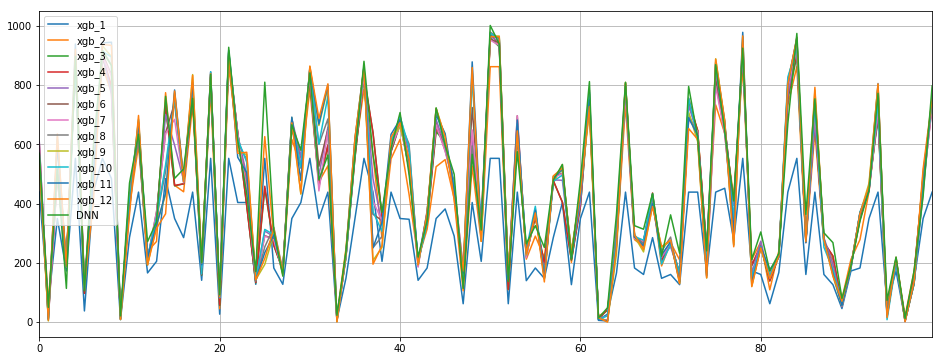

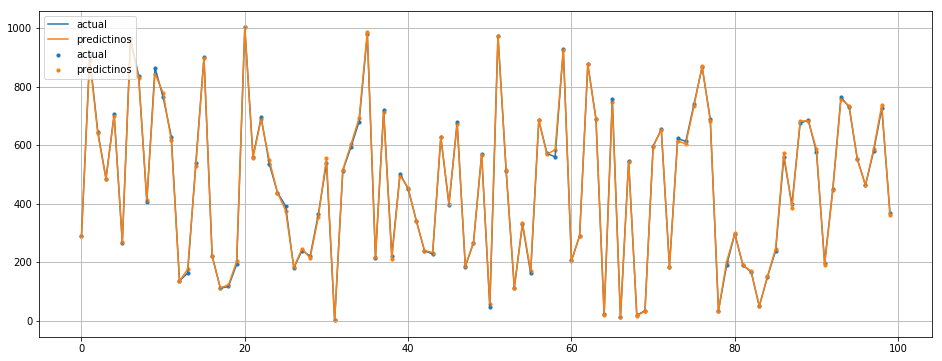

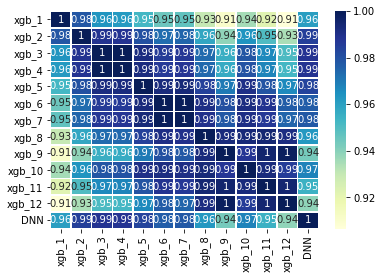

In [72]:
output_dnn__ = NN_model_1.predict(select_X_train)
output_dnn___ = [i[0] for i in output_dnn__]

df_pred = pd.DataFrame({
    'xgb_1':predicted_xgb_1,
    'xgb_2':predicted_xgb_2,
    'xgb_3':predicted_xgb_3,
    'xgb_4':predicted_xgb_4,
    'xgb_5':predicted_xgb_5,
    'xgb_6':predicted_xgb_6,
    'xgb_7':predicted_xgb_7,
    'xgb_8':predicted_xgb_8,
    'xgb_9':predicted_xgb_9,
    'xgb_10':predicted_xgb_10,
    'xgb_11':predicted_xgb_11,
    'xgb_12':predicted_xgb_12,
    'DNN':output_dnn___,
})
X_train, X_test, y_train, y_test = train_test_split(df_pred, y_train, test_size=test_size, random_state=seed)

ridge_clf.fit(X_train,y_train)

predictinos = ridge_clf.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
print("forest rmse: " + str(math.sqrt(squared_sum/len(y_test))))

min_x_test = y_test[0:100]
predictinos = ridge_clf.predict(X_test)[0:100]

original_y_test = []
x = []
for counter,i in enumerate(min_x_test):
    original_y_test.append(i)
    x.append(counter)

    
df_plot = df_pred[0:100]
fig, ax = plt.subplots(figsize=(16,6))
df_plot.plot(ax=ax)
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()


fig, ax = plt.subplots(figsize=(16,6))
ax.plot(original_y_test,linewidth=1.5,label="actual")
ax.scatter(x,original_y_test,s=10,label="actual")
ax.plot(predictinos,linewidth=1.5,label="predictinos")
ax.scatter(x,predictinos,s=10,label="predictinos")
ax.grid(True)
ax.legend(loc='upper left',)
plt.show()

corr_hm = sns.heatmap(df_pred.corr(), 
                xticklabels=df_pred.corr().columns,
                yticklabels=df_pred.corr().columns,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                linewidths=.5)
plt.show()

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error

predictinos_r = ridge_clf.predict(X_test)

out_put_r = r2_score(y_test, predictinos_r)
out_put_mae = mean_absolute_error(y_test, predictinos_r)

In [80]:
print("R2 valure for combined with feature: "+str(out_put))
print("mae valure for combined with feature: "+str(out_put_mae))

R2 valure for combined with feature: 0.9987041415566589
mae valure for combined with feature: 6.737279230264966


In [86]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
out_put_mape = mean_absolute_percentage_error(predictinos_r,y_test)
print("mape valure for combined with feature: "+str(out_put_mape))

mape valure for combined with feature: 9.0405392625432


In [82]:
predictinos_r

array([290.15352745, 892.72351037, 640.99947855, ..., 289.85612766,
       769.52909846, 957.83128397])

In [83]:
X_test

,xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9,xgb_10,xgb_11,xgb_12,DNN
6617,161.177948,257.372803,294.416595,295.706329,285.533875,279.372833,273.422913,287.461639,290.389099,290.082306,290.915222,289.786530,294.640015
717,484.693359,794.096313,835.951843,840.179016,831.732422,840.323914,837.793213,842.723999,872.262207,841.777649,888.919678,883.259583,785.792725
3917,350.017517,577.013733,555.048645,554.806274,599.084961,618.546692,608.032532,644.501221,640.876221,630.129089,638.687561,641.558594,568.402161
345,290.860168,418.373718,428.421234,429.710968,442.977570,441.337341,438.419586,472.933472,477.740997,449.535828,452.991241,481.237427,432.009918
2267,347.454102,443.437958,427.277252,474.497253,526.737915,600.974670,549.750122,663.291931,696.886780,661.377319,685.508484,697.591675,476.875793
2784,140.237625,235.313080,220.257996,221.547745,236.431137,217.492157,214.961426,233.863907,260.522125,217.849533,253.124969,255.511734,268.102203
3636,553.089294,862.492188,931.797485,945.388611,951.414246,949.674927,937.694458,956.696655,961.001282,972.096741,968.199524,960.367493,972.459351
4882,439.141174,733.433044,774.407166,778.634338,820.289246,782.437561,779.519775,806.353271,823.892090,828.683167,807.533752,826.615784,761.446533
1229,286.530914,434.473022,401.986755,403.414307,408.896454,418.896790,416.220276,413.079590,416.807861,420.875854,422.093079,412.907959,422.732178
3492,350.017517,617.156921,690.548157,691.975708,730.044128,758.017212,750.260010,832.335571,822.678223,804.441956,827.589478,847.745178,811.114502
